In [1]:
!pip install gdown
!gdown --id 1HjS3-aAoWpynwuGZraq74FPB7Vy7J5bB
!apt-get install unrar
!unrar x /kaggle/working/snake_dataset_latest.rar

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1HjS3-aAoWpynwuGZraq74FPB7Vy7J5bB
From (redirected): https://drive.google.com/uc?id=1HjS3-aAoWpynwuGZraq74FPB7Vy7J5bB&confirm=t&uuid=bc387a72-c0cc-497c-ba05-ca2049521470
To: /kaggle/working/snake_dataset_latest.rar
100%|█████████████████████████████████████████| 149M/149M [00:01<00:00, 140MB/s]
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  unrar
0 upgraded, 1 newly installed, 0 to remove and 74 not upgraded.
Need to get 145 kB of archives.
After this operation, 339 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 unrar amd64 1:6.1.5-1 [145 kB]
Fetched 145 kB in

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,BatchNormalization,MaxPooling2D,Conv2DTranspose,Activation, Input,concatenate
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Add, DepthwiseConv2D,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%config Completer.use_jedi = False
plt.rcParams['font.size'] = 10

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow as tf
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, Input
from tensorflow.keras.layers import Activation, Concatenate, Conv2D, Multiply
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.densenet import DenseNet121
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras import regularizers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
IMG_SIZE=224
BATCH_SIZE=16

path='/kaggle/working/snake_dataset_latest'

# datagen=ImageDataGenerator(rescale=1/255.,
#                            zoom_range=0.2,
#                            rotation_range=30,
#                            vertical_flip=True,
#                            horizontal_flip=True,
#                            validation_split=0.15)

datagen=ImageDataGenerator(rescale=1/255.,
                           zoom_range=0.2,
                           rotation_range=30,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,     
                           vertical_flip=True,
                           horizontal_flip=True,
                           fill_mode='nearest',
                           validation_split=0.10
                          )

traindata=datagen.flow_from_directory(path,
                                       target_size=(IMG_SIZE,IMG_SIZE),
                                       batch_size=BATCH_SIZE,
                                       shuffle=True,
                                       class_mode='categorical',
                                       subset='training',
                                       seed=42)

valdata=datagen.flow_from_directory(path,
                                    shuffle=False,
                                    batch_size=BATCH_SIZE,
                                    target_size=(IMG_SIZE,IMG_SIZE),
                                    class_mode='categorical',
                                    subset='validation', 
                                    seed=42)

Found 2641 images belonging to 15 classes.
Found 286 images belonging to 15 classes.


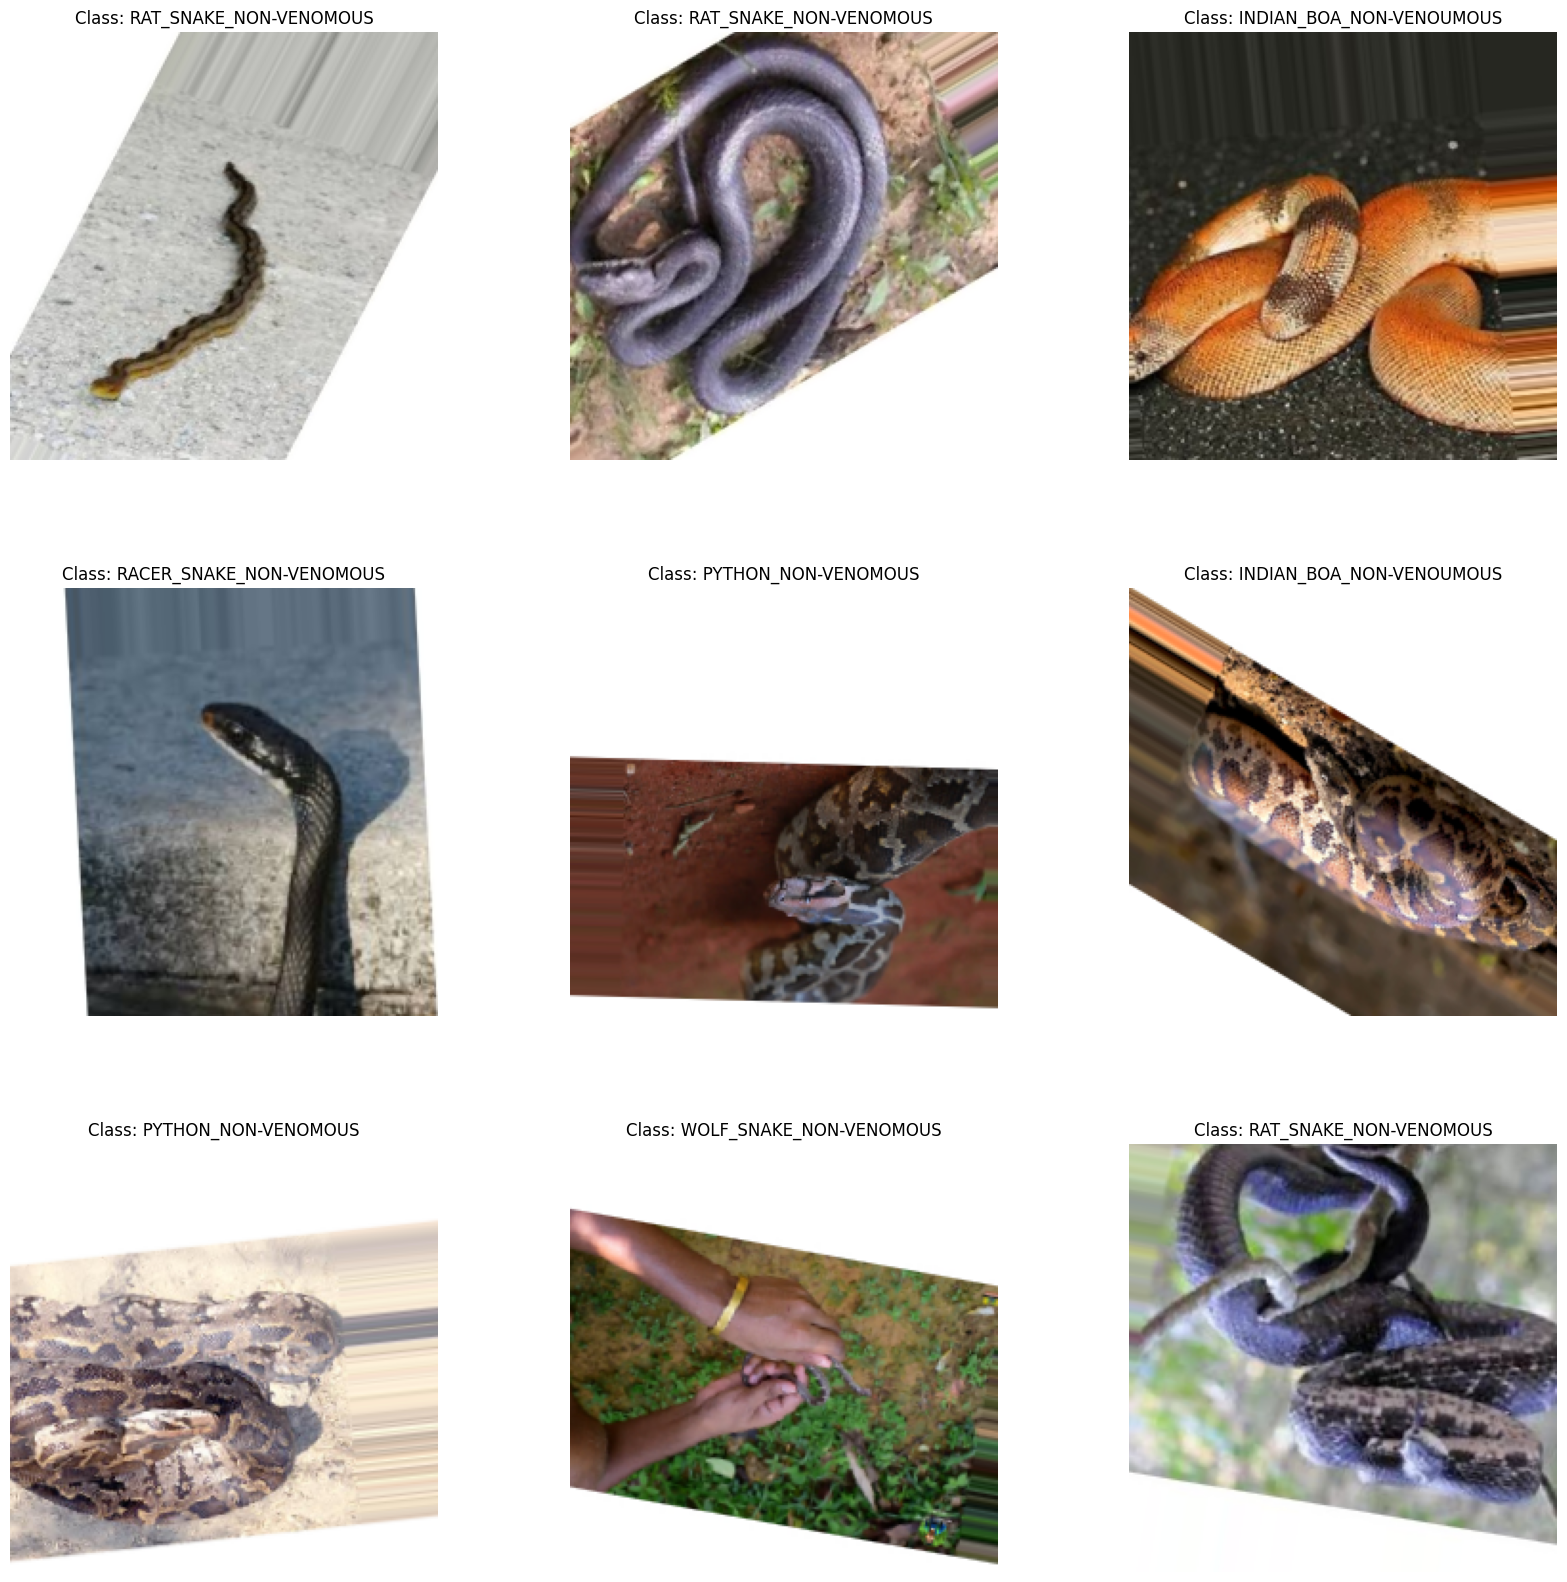

In [6]:
labels=[key for key in traindata.class_indices]
samples=traindata.__next__()
images=samples[0]
target=samples[1]
plt.rcParams['figure.figsize']=(20,20)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[np.argmax(target[i],axis=0)]}")
    plt.axis('off')

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Flatten, Dropout, BatchNormalization, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam

In [9]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model = Xception(include_top=False, weights='imagenet', input_shape=(224, 224, 3))


83683744/83683744 [==============================] - 4s 0us/step


In [10]:
for layer in base_model.layers:
    if 'block11' in layer.name or 'block12' in layer.name or 'block13' in layer.name or 'block14' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

In [11]:
for layer in base_model.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv1_bn False
block1_conv1_act False
block1_conv2 False
block1_conv2_bn False
block1_conv2_act False
block2_sepconv1 False
block2_sepconv1_bn False
block2_sepconv2_act False
block2_sepconv2 False
block2_sepconv2_bn False
conv2d False
block2_pool False
batch_normalization False
add False
block3_sepconv1_act False
block3_sepconv1 False
block3_sepconv1_bn False
block3_sepconv2_act False
block3_sepconv2 False
block3_sepconv2_bn False
conv2d_1 False
block3_pool False
batch_normalization_1 False
add_1 False
block4_sepconv1_act False
block4_sepconv1 False
block4_sepconv1_bn False
block4_sepconv2_act False
block4_sepconv2 False
block4_sepconv2_bn False
conv2d_2 False
block4_pool False
batch_normalization_2 False
add_2 False
block5_sepconv1_act False
block5_sepconv1 False
block5_sepconv1_bn False
block5_sepconv2_act False
block5_sepconv2 False
block5_sepconv2_bn False
block5_sepconv3_act False
block5_sepconv3 False
block5_sepconv3_bn False
add_3 False
bl

In [18]:
def channel_attention_module(x, ratio=4):
    batch, _, _, channel = x.shape

    ## Shared layers
    l1 = Dense(channel//ratio, activation="relu", use_bias=False)
    l2 = Dense(channel, use_bias=False)

    ## Global Average Pooling
    x1 = GlobalAveragePooling2D()(x)
    x1 = l1(x1)
    x1 = l2(x1)

    ## Global Max Pooling
    x2 = GlobalMaxPooling2D()(x)
    x2 = l1(x2)
    x2 = l2(x2)

    ## Add both the features and pass through sigmoid
    feats = x1 + x2
    feats = Activation("sigmoid")(feats)
    feats = Multiply()([x, feats])

    return feats

def spatial_attention_module(x):
    ## Average Pooling
    x1 = tf.reduce_mean(x, axis=-1)
    x1 = tf.expand_dims(x1, axis=-1)

    ## Max Pooling
    x2 = tf.reduce_max(x, axis=-1)
    x2 = tf.expand_dims(x2, axis=-1)

    ## Concatenat both the features
    feats = Concatenate()([x1, x2])
    ## Conv layer
    feats = Conv2D(1, kernel_size=7, padding="same", activation="sigmoid")(feats)
    feats = Multiply()([x, feats])

    return feats

def cbam(x):
    x = channel_attention_module(x)
    x = spatial_attention_module(x)
    return x

In [24]:
#Create an input layer for the model
input_layer = Input(shape=(224, 224, 3))

#Get the output from the InceptionV3
Xception_output = base_model(input_layer)
Xception_output = tf.keras.layers.Conv2D(512, kernel_size=(1,1), strides=1, padding='same', activation='relu')(Xception_output)

atten_output = cbam(Xception_output)
flatten_output = tf.keras.layers.Flatten()(atten_output)

flatten_output=tf.keras.layers.Dropout(.5)(flatten_output)
# Add a dense layer for classification
dense_layer = Dense(1024, activation='relu', kernel_regularizer=regularizers.L1(l1=1e-5),activity_regularizer=regularizers.L2(1e-5))(flatten_output)
output_layer = tf.keras.layers.Dense(15, activation='softmax')(dense_layer)

model = Model(inputs=input_layer, outputs=output_layer)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 xception (Functional)          (None, 7, 7, 2048)   20861480    ['input_3[0][0]']                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 7, 7, 512)    1049088     ['xception[1][0]']               
                                                                                                  
 global_average_pooling2d_1 (Gl  (None, 512)         0           ['conv2d_6[0][0]']         

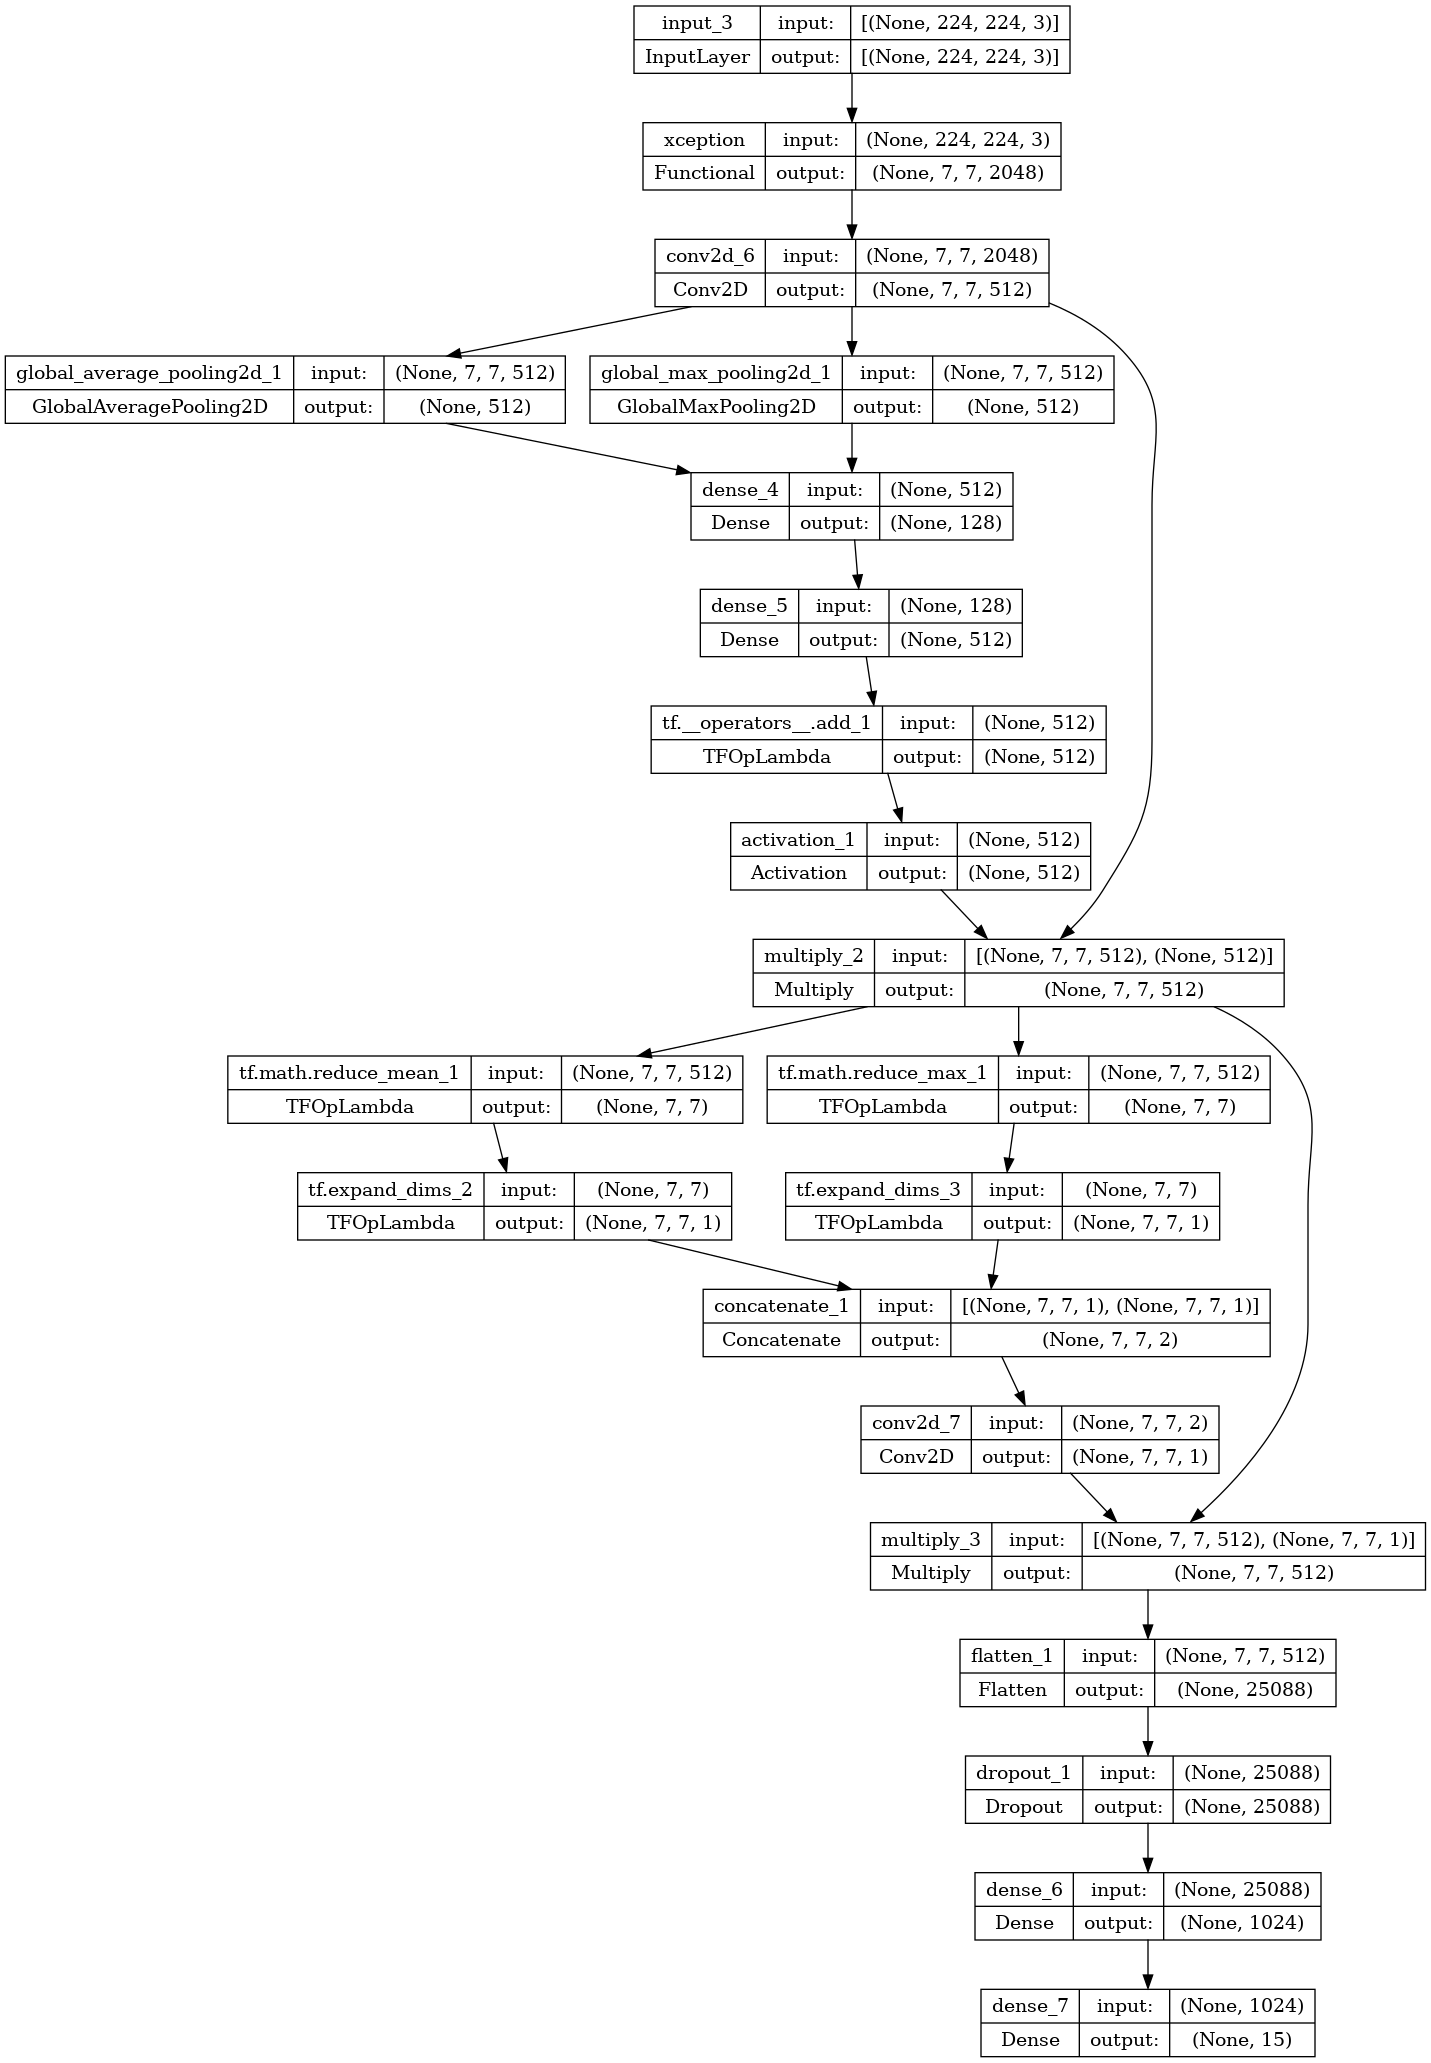

In [25]:
model.summary()
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_snake_latest__Xception_custom_CBAM.png', show_shapes=True, show_layer_names=True)

In [26]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model_snake_latest__Xception_custom_CBAM.h5',
    monitor='val_acc',
    mode='max',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc','Precision', 'Recall', tf.keras.metrics.AUC(from_logits=True), tf.keras.metrics.FalsePositives(name='fp'),tf.keras.metrics.FalseNegatives(name='fn'), tf.keras.metrics.TruePositives(name='tp'), tf.keras.metrics.TrueNegatives(name='tn')])


from tensorflow.keras.callbacks import CSVLogger
csv_logger=CSVLogger("best_snake_latest__Xception_custom_CBAM.log", separator=',', append=True)

Epoch 1/150
166/166 [==============================] - ETA: 0s - loss: 3.9359 - acc: 0.2991 - precision: 0.6519 - recall: 0.1227 - auc_1: 0.7961 - fp: 173.0000 - fn: 2317.0000 - tp: 324.0000 - tn: 36801.0000
Epoch 1: val_acc improved from -inf to 0.46154, saving model to best_model_snake_latest__Xception_custom_CBAM.h5
166/166 [==============================] - 57s 229ms/step - loss: 3.9359 - acc: 0.2991 - precision: 0.6519 - recall: 0.1227 - auc_1: 0.7961 - fp: 173.0000 - fn: 2317.0000 - tp: 324.0000 - tn: 36801.0000 - val_loss: 3.5077 - val_acc: 0.4615 - val_precision: 0.6990 - val_recall: 0.2517 - val_auc_1: 0.8655 - val_fp: 31.0000 - val_fn: 214.0000 - val_tp: 72.0000 - val_tn: 3973.0000
Epoch 2/150
166/166 [==============================] - ETA: 0s - loss: 3.0487 - acc: 0.5517 - precision: 0.7710 - recall: 0.3824 - auc_1: 0.9186 - fp: 300.0000 - fn: 1631.0000 - tp: 1010.0000 - tn: 36674.0000
Epoch 2: val_acc improved from 0.46154 to 0.59441, saving model to best_model_snake_latest

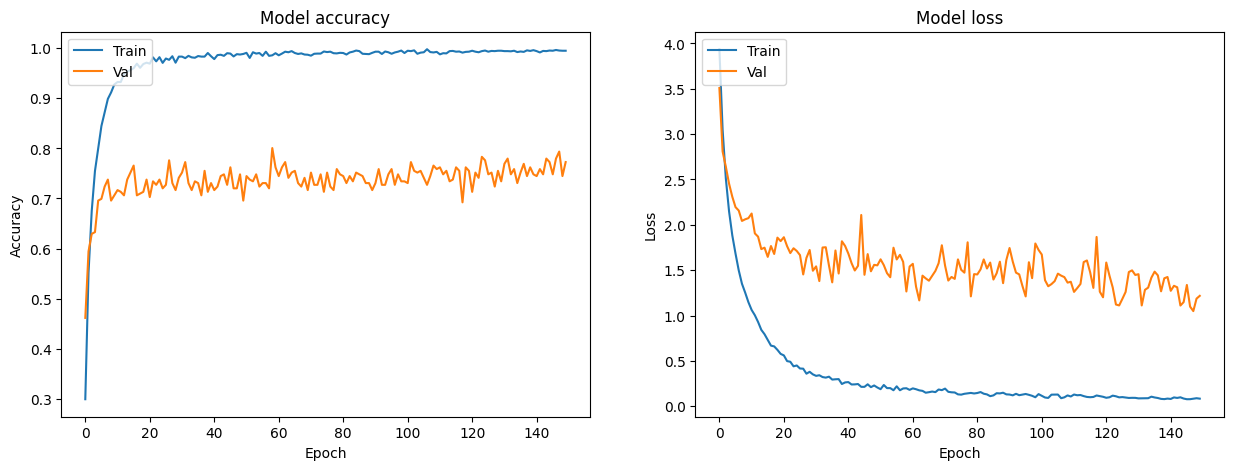

In [27]:
history = model.fit(traindata, steps_per_epoch=len(traindata), validation_data=valdata, validation_steps=len(valdata), epochs=150, callbacks=[csv_logger,checkpoint_callback])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(history.history['acc'])
axs[0].plot(history.history['val_acc'])
axs[0].set_title('Model accuracy')
axs[0].set(ylabel= 'Accuracy')
axs[0].legend(['Train', 'Val'], loc='upper left')

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].set(ylabel= 'Loss')
axs[1].legend(['Train', 'Val'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

In [28]:
print("Accuracy of our model on validation data : " , model.evaluate(valdata)[1]*100 , "%")

18/18 [==============================] - 3s 183ms/step - loss: 1.1026 - acc: 0.7867 - precision: 0.8178 - recall: 0.7692 - auc_1: 0.9446 - fp: 49.0000 - fn: 66.0000 - tp: 220.0000 - tn: 3955.0000
Accuracy of our model on validation data :  78.67133021354675 %


In [29]:
predictions = model.predict(valdata)

18/18 [==============================] - 4s 180ms/step


In [32]:
y_pred = np.argmax(predictions, axis=1)
y_true = valdata.classes

In [33]:
labels = {value: key for key, value in traindata.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : BLACK_HEADED_ROYAL_SNAKE_NON-VENOUMOUS
1 : COBRA_VENOUMOUS
2 : COMMON_KRAIT-VENOMOUS
3 : COMMON_TRINKET_NON-VENOUMOUS
4 : INDIAN_BOA_NON-VENOUMOUS
5 : INDIAN_CAT_VEN
6 : KEELBACK_NON-VENOMOUS
7 : KUKRI_NON-VENOMOUS
8 : PIT_VIPPER_VENOMOUS
9 : PYTHON_NON-VENOMOUS
10 : RACER_SNAKE_NON-VENOMOUS
11 : RAT_SNAKE_NON-VENOMOUS
12 : RUSSELL_VIPPER_VENOMOUS
13 : SAW_SCALED_VIPPER_VENOMOUS
14 : WOLF_SNAKE_NON-VENOMOUS


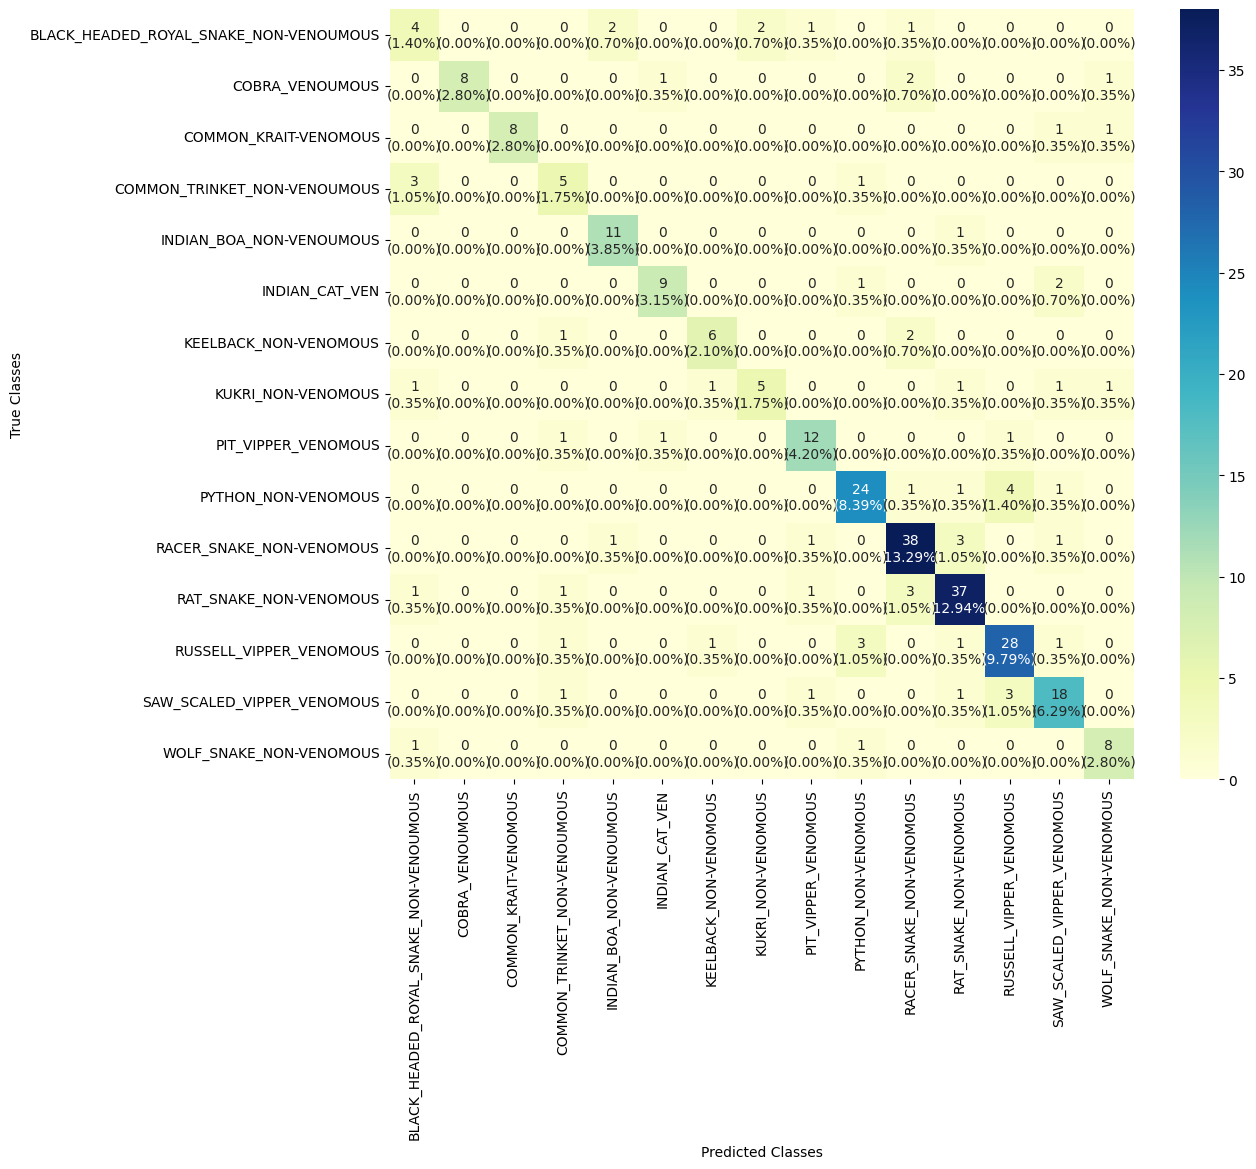

In [34]:
from sklearn.metrics import confusion_matrix

cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(15, 15)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [1]:
import os

directory_path = '/kaggle/working/'

# List all files in the specified directory
files = os.listdir(directory_path)

for file in files:
    print(file)

snake_dataset_latest
best_snake_latest__Xception_custom_CBAM.log
.virtual_documents
snake_dataset_latest.rar
best_model_snake_latest__Xception_custom_CBAM.h5
model_plot_snake_latest__Xception_custom_CBAM.png


In [3]:
import tensorflow as tf
model = tf.keras.models.load_model('/kaggle/working/best_model_snake_latest__Xception_custom_CBAM.h5')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 xception (Functional)          (None, 7, 7, 2048)   20861480    ['input_3[0][0]']                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 7, 7, 512)    1049088     ['xception[0][0]']               
                                                                                                  
 global_average_pooling2d_1 (Gl  (None, 512)         0           ['conv2d_6[0][0]']         

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,BatchNormalization,MaxPooling2D,Conv2DTranspose,Activation, Input,concatenate
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Add, DepthwiseConv2D,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%config Completer.use_jedi = False
plt.rcParams['font.size'] = 10

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow as tf
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, Input
from tensorflow.keras.layers import Activation, Concatenate, Conv2D, Multiply
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.densenet import DenseNet121
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras import regularizers

In [7]:
IMG_SIZE=224
BATCH_SIZE=16

path='/kaggle/working/snake_dataset_latest'

# datagen=ImageDataGenerator(rescale=1/255.,
#                            zoom_range=0.2,
#                            rotation_range=30,
#                            vertical_flip=True,
#                            horizontal_flip=True,
#                            validation_split=0.15)

datagen=ImageDataGenerator(rescale=1/255.,
                           zoom_range=0.2,
                           rotation_range=30,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,     
                           vertical_flip=True,
                           horizontal_flip=True,
                           fill_mode='nearest',
                           validation_split=0.10
                          )

traindata=datagen.flow_from_directory(path,
                                       target_size=(IMG_SIZE,IMG_SIZE),
                                       batch_size=BATCH_SIZE,
                                       shuffle=True,
                                       class_mode='categorical',
                                       subset='training',
                                       seed=42)

valdata=datagen.flow_from_directory(path,
                                    shuffle=False,
                                    batch_size=BATCH_SIZE,
                                    target_size=(IMG_SIZE,IMG_SIZE),
                                    class_mode='categorical',
                                    subset='validation', 
                                    seed=42)

Found 2641 images belonging to 15 classes.
Found 286 images belonging to 15 classes.


In [8]:
print("Accuracy of our model on validation data : " , model.evaluate(valdata)[1]*100 , "%")

18/18 [==============================] - 3s 184ms/step - loss: 1.5085 - acc: 0.7413 - precision: 0.7757 - recall: 0.7378 - auc_1: 0.9325 - fp: 61.0000 - fn: 75.0000 - tp: 211.0000 - tn: 3943.0000
Accuracy of our model on validation data :  74.12587404251099 %


18/18 [==============================] - 3s 177ms/step
Label Mappings for classes present in the training and validation datasets

0 : BLACK_HEADED_ROYAL_SNAKE_NON-VENOUMOUS
1 : COBRA_VENOUMOUS
2 : COMMON_KRAIT-VENOMOUS
3 : COMMON_TRINKET_NON-VENOUMOUS
4 : INDIAN_BOA_NON-VENOUMOUS
5 : INDIAN_CAT_VEN
6 : KEELBACK_NON-VENOMOUS
7 : KUKRI_NON-VENOMOUS
8 : PIT_VIPPER_VENOMOUS
9 : PYTHON_NON-VENOMOUS
10 : RACER_SNAKE_NON-VENOMOUS
11 : RAT_SNAKE_NON-VENOMOUS
12 : RUSSELL_VIPPER_VENOMOUS
13 : SAW_SCALED_VIPPER_VENOMOUS
14 : WOLF_SNAKE_NON-VENOMOUS


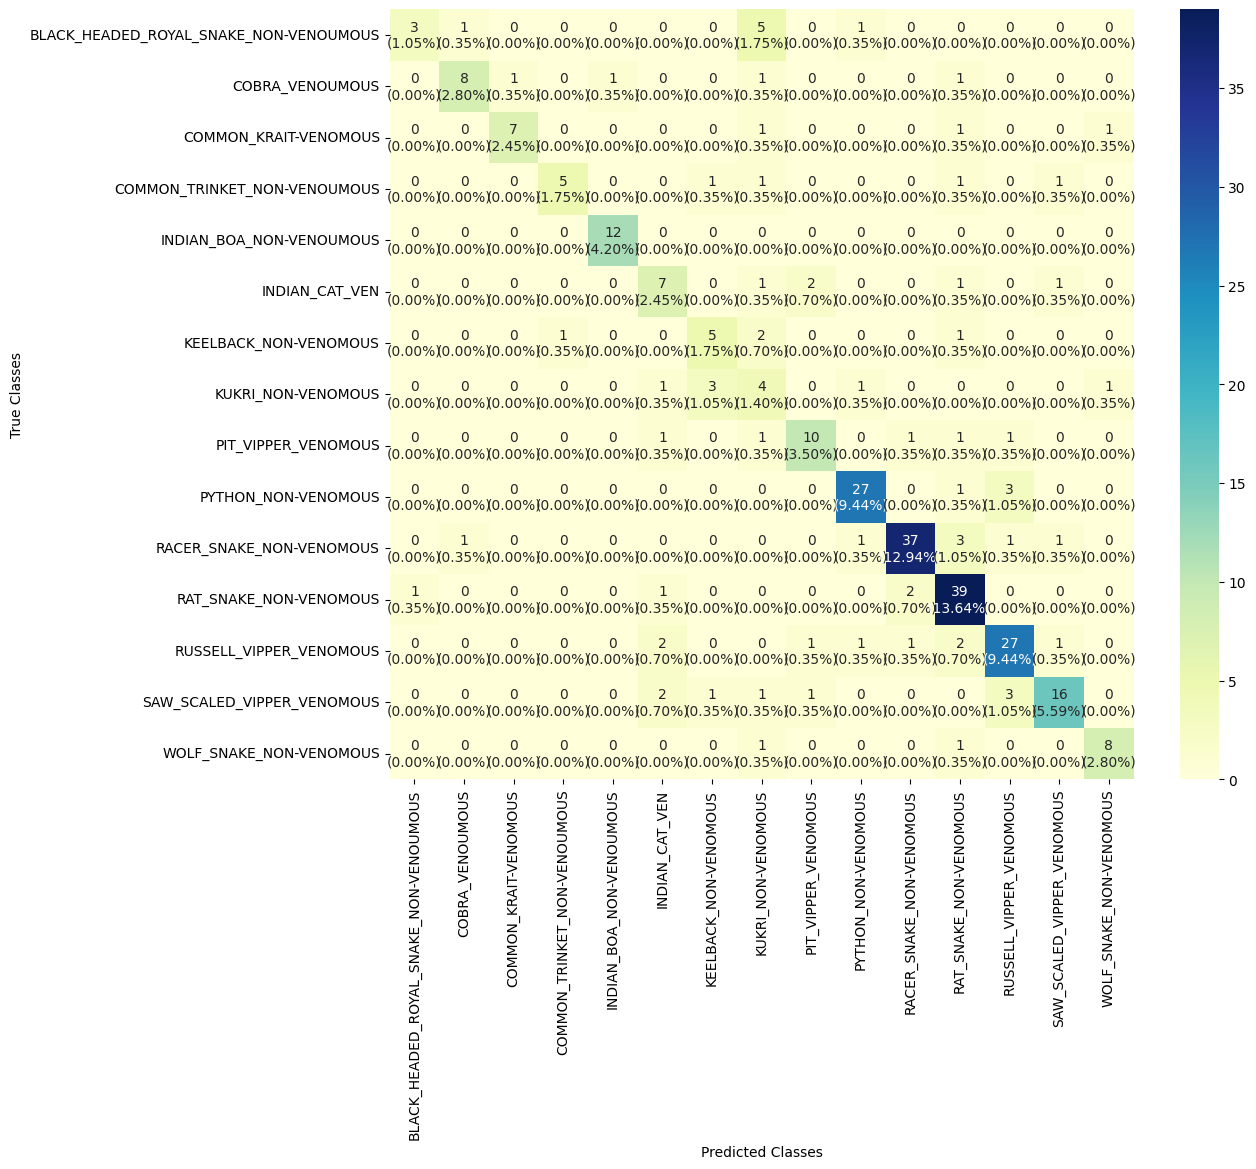

In [10]:
predictions = model.predict(valdata)
y_pred = np.argmax(predictions, axis=1)
y_true = valdata.classes

labels = {value: key for key, value in traindata.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")
    
from sklearn.metrics import confusion_matrix

cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(15, 15)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [11]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.30      0.43        10
           1       0.80      0.67      0.73        12
           2       0.88      0.70      0.78        10
           3       0.83      0.56      0.67         9
           4       0.92      1.00      0.96        12
           5       0.50      0.58      0.54        12
           6       0.50      0.56      0.53         9
           7       0.22      0.40      0.29        10
           8       0.71      0.67      0.69        15
           9       0.87      0.87      0.87        31
          10       0.90      0.84      0.87        44
          11       0.75      0.91      0.82        43
          12       0.77      0.77      0.77        35
          13       0.80      0.67      0.73        24
          14       0.80      0.80      0.80        10

    accuracy                           0.75       286
   macro avg       0.73      0.69      0.70       286
weighted avg       0.77   

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

from sklearn.metrics import roc_auc_score

In [23]:
from sklearn.preprocessing import LabelBinarizer
# Assuming y_true is your original label array with shape (444,)
lb = LabelBinarizer()
y_true_one_hot = lb.fit_transform(y_true)
y_pred_one_hot = lb.fit_transform(y_pred)

In [24]:
y_pred_one_hot.shape

(286, 15)

In [25]:
#n_classes = len(true_labels[0])  # Number of classes
n_classes = 15

fpr = {}  # False Positive Rate
tpr = {}  # True Positive Rate
roc_auc = {}  # AUC for each class

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_one_hot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [26]:
average_auc = np.mean(list(roc_auc.values()))

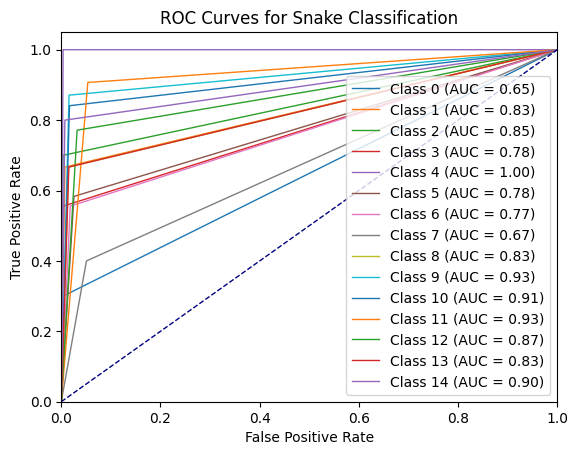

In [27]:
import matplotlib.pyplot as plt

plt.figure()
lw = 1

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Snake Classification')
plt.legend(loc="lower right")
plt.show()